In [1]:
import gym
from gym.wrappers import FilterObservation, FlattenObservation, RecordVideo, TimeLimit
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import TD3

from environment import ARESEA
from utils import FilterAction

In [2]:
env = ARESEA()
env = FilterObservation(env, ["beam","magnets"])
env = FilterAction(env, [2,4], replace=0)
env = FlattenObservation(env)
env.reset()

array([ 0.00025939,  0.0003922 , -0.00047961,  0.00042642,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ], dtype=float32)

In [3]:
env.action_space

Box([-0.0061782 -0.0061782], [0.0061782 0.0061782], (2,), float32)

/usr/local/Caskroom/miniconda/base/envs/rl39/lib/python3.9/site-packages/gym/wrappers/record_video.py:41: UserWarning: WARN: Overwriting existing videos at /Users/jankaiser/Documents/DESY/ares-ea-rl/recordings folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


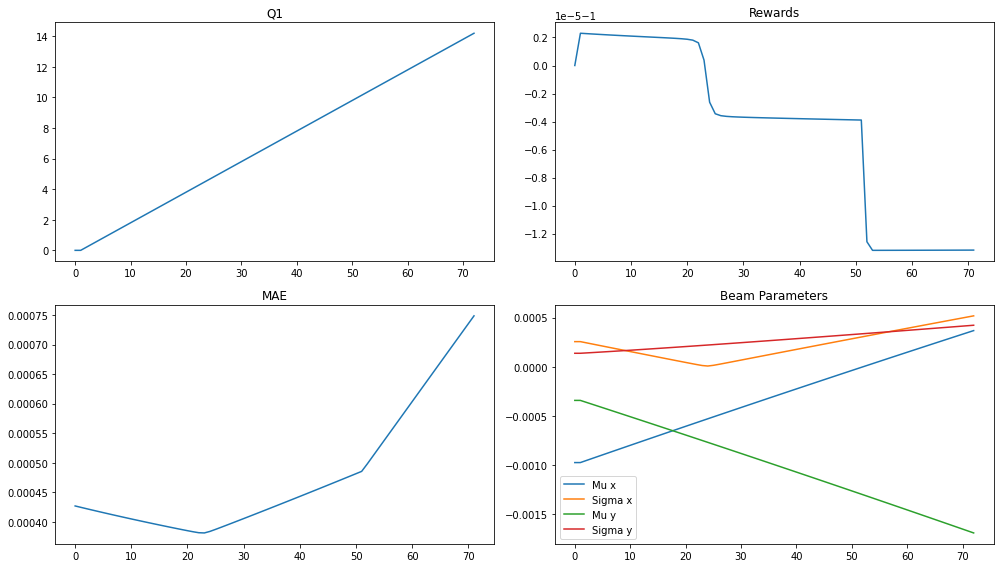

In [2]:
env = ARESEA()
env = TimeLimit(env, 72)
env = RecordVideo(env, "recordings", episode_trigger=lambda x: True)

observations = []
rewards = []
maes = []

q1 = 0
done = False
observation = env.reset()
observations.append(observation)
while not done:
    observation, reward, done, info = env.step(np.array([q1]))
    q1 += 0.2

    observations.append(observation)
    rewards.append(reward)
    maes.append(info["mae"])

env.reset()

plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
plt.title("Q1")
plt.plot([o["magnets"][0] for o in observations])
plt.subplot(2, 2, 2)
plt.title("Rewards")
plt.plot(rewards)
plt.subplot(2, 2, 3)
plt.title("MAE")
plt.plot(maes)
plt.subplot(2, 2, 4)
plt.title("Beam Parameters")
plt.plot([o["beam"][0] for o in observations], label="Mu x")
plt.plot([o["beam"][1] for o in observations], label="Sigma x")
plt.plot([o["beam"][2] for o in observations], label="Mu y")
plt.plot([o["beam"][3] for o in observations], label="Sigma y")
plt.legend()
plt.tight_layout()
plt.show()

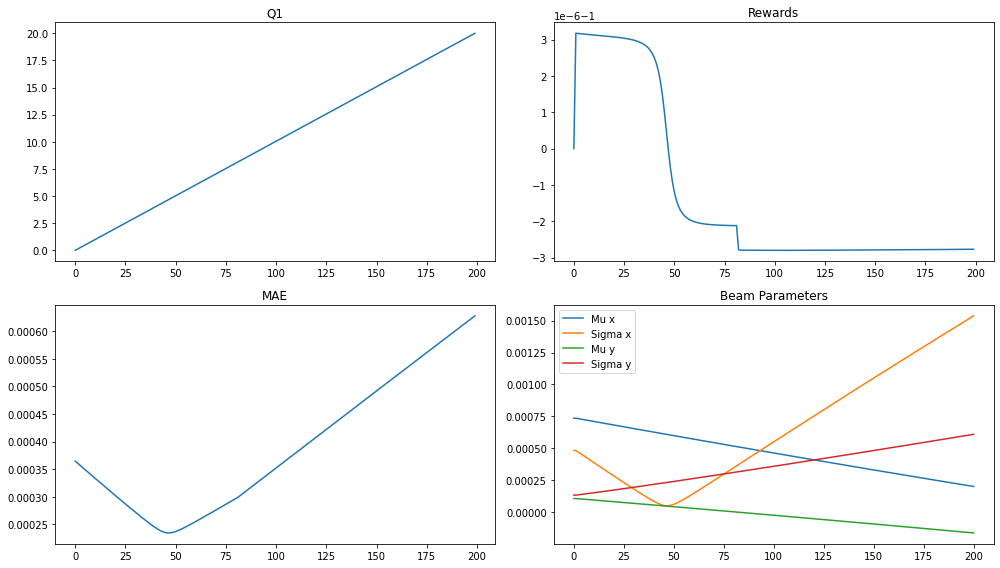

In [6]:
env = ARESEA()

q1s = np.linspace(0, 20, 200)
observations = []
rewards = []
maes = []

observation = env.reset()
observations.append(observation)
for q1 in q1s:
    observation, reward, done, info = env.step(np.array([q1]))

    observations.append(observation)
    rewards.append(reward)
    maes.append(info["mae"])

env.close()

plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
plt.title("Q1")
plt.plot(q1s)
plt.subplot(2, 2, 2)
plt.title("Rewards")
plt.plot(rewards)
plt.subplot(2, 2, 3)
plt.title("MAE")
plt.plot(maes)
plt.subplot(2, 2, 4)
plt.title("Beam Parameters")
plt.plot([o["beam"][0] for o in observations], label="Mu x")
plt.plot([o["beam"][1] for o in observations], label="Sigma x")
plt.plot([o["beam"][2] for o in observations], label="Mu y")
plt.plot([o["beam"][3] for o in observations], label="Sigma y")
plt.legend()
plt.tight_layout()
plt.show()